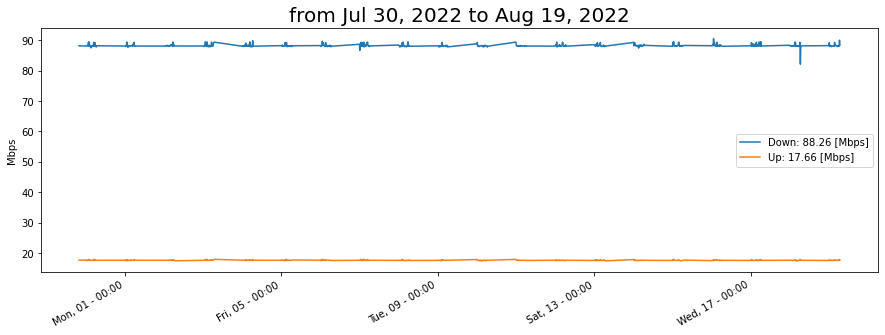

In [54]:
### speedtest data analysis ###
# ver 1.0
# Author: Omar H. Nina Flores
# Date: 2022-08-19

# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime
from matplotlib import dates as mpl_dates

# select the original file 
file_name = 'speedtest.csv'

# Columns names
names = ["date", "server","ID","latency","jitter","lost","downMbps","upMbps","downMbytes","upMbytes","url","Count"]

# Import speedTest file
speedtest = pd.read_csv(file_name, sep='","', header=None, engine='python', names=names).replace('"','', regex=True)

# Customizing fields
speedtest['downMbps'] = round(speedtest['downMbps'] / 125000, 2)
speedtest['upMbps'] = round(speedtest['upMbps'] / 125000, 2)
speedtest['latency'] = round(speedtest['latency'], 2)
speedtest['jitter'] = round(speedtest['jitter'], 2)
speedtest['latency'] = round(speedtest['latency'], 2)
speedtest['downMbytes'] = round(speedtest['downMbytes'] / 1000000, 2)
speedtest['upMbytes'] = round(speedtest['upMbytes'] / 1000000, 2)

#speedtest[["date", "server", "latency","jitter", "lost", "downMbps", "upMbps", "downMbytes", "upMbytes"]].head()

# Format date field
speedtest.date = speedtest.date.astype('datetime64[ns]')

title = "from " + speedtest.date[0].strftime("%b %d, %Y")
title = title + " to " + speedtest.date.iloc[-1].strftime("%b %d, %Y")


# Labels for Download and Upload
# with AVG values
downLabel = 'Down: ' + str(round(speedtest.downMbps.mean(), 2)) + ' [Mbps]'
upLabel = 'Up: ' + str(round(speedtest.upMbps.mean(), 2)) + ' [Mbps]'

# Getting the t-axis
t = speedtest["date"]

# Getting the y-axis
downSpeed = speedtest["downMbps"]
upSpeed = speedtest["upMbps"]

### Create figure and plot ### space
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(t, downSpeed, label=downLabel)
ax.plot(t, upSpeed, label=upLabel)
ax.legend()
plt.ylabel('Mbps')
plt.gcf().autofmt_xdate()
date_form = DateFormatter('%a, %d - %H:%M')
ax.xaxis.set_major_formatter(date_form)
plt.title(title, fontdict={'fontsize': 20})
plt.show()

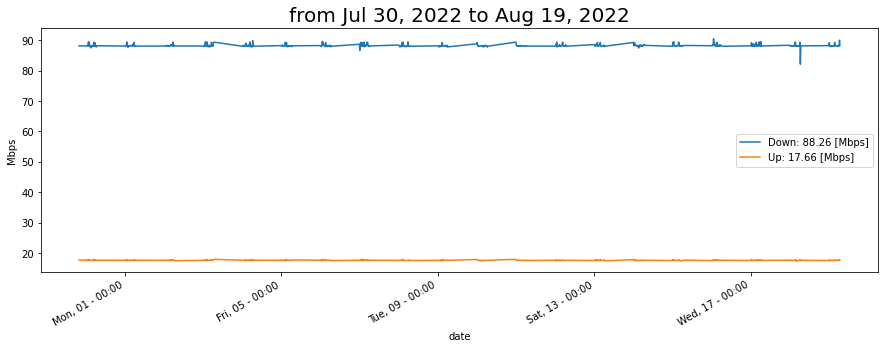